# 9 - Taller NO Evaluado de Classificación
## Minería de Datos 2019

### 1.- Selección de Datos
En este taller utilizaremos un dataset "bien portado", es decir, que no requiere mucho preprocesamiento (i.e. imputación, control de NaNs, variables no númericas, etc.). La idea es que usted se pueda concentrar en las métricas de selección de clasificadores, más que en el preprocesamiento de los datos. Para esto, cargue el dataset llamado `heart.csv` que puede encontrar en la sección 9 del aula (junto a este archivo). Este dataset contiene 303 pacientes con 13 características (resultados de exámenes o datos fisiológicos):
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

En la característica 14 encontrara el `target`, que corresponde a 1 si el paciente tiene una affección cardiaca y 0 si que está sano.

Como de costumbre, recuerde describir los datos utilizando pandas para una mayor comprensión.

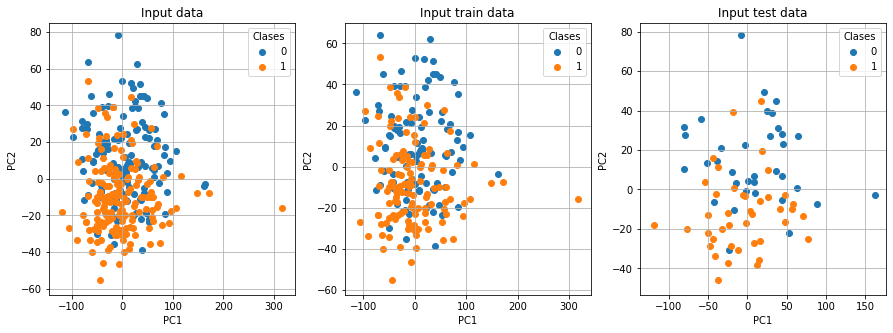

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def print_tabstat(table):
    print(table.dtypes)
    print('DATOS ENTRENAMIENTO')
    print('Media:')
    print(table.mean())
    print('\nVarianza:')
    print(table.var())
    print('\nMáximos:')
    print(table.max())
    print('\nMínimos:')
    print(table.min())
    print('\nCaracteristica    Tipo de dato:')
    print(table.dtypes)
    return

def plot_corr_matrix(data,features=None,annot=True,s=(16,10)):
    fig= plt.figure(figsize=s)
    ax= fig.add_subplot(111)
    if features is None:
        corr = data.corr()
    else:
        corr = data[features].corr()
    ax= sns.heatmap(corr, annot=annot,
                    xticklabels=corr.columns,
                    yticklabels=corr.columns, cmap="seismic",vmin=-1,vmax=1)
    plt.title("Correlation Matrix", fontsize = 15)
    plt.show()
    return

def get_features(table, ref_feature):
    features = []
    for feature in table.columns:
        if (feature != ref_feature):
            features.append(feature)
    return (features)

def standardize_data(table, features):
    scaler = StandardScaler().fit(table[features])
    stdtab = pd.DataFrame(scaler.transform(table[features]))
    stdtab.columns = features
    for feature in features:
        table['{}STD'.format(feature)] = stdtab[feature]
    return

def get_STDfeatures(table):
    STDfeatures = []
    for feature in table.columns:
        if ("STD" in feature):
            STDfeatures.append(feature)
    return (STDfeatures)

def do_PCA(n, table, features):
    pca = decomposition.PCA(n_components=n)
    PCA_values = pca.fit_transform(table[features])
    ind_pca = []
    for i in range(n):
        ind_pca.append("PC"+str(i+1))
    PCA_table = pd.DataFrame(PCA_values, columns=ind_pca)
    for i in range(n):
        table["PC"+str(i+1)] = PCA_table["PC"+str(i+1)]
    return

def split_data_set(table, X_features, Y_feature, test_percent, seed):
    X = table[X_features]
    Y = table[Y_feature]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_percent, random_state = seed)
    return (X_train, X_test, Y_train, Y_test)

def plot_PCA_Classification(table, ref_feature, title, ax):
    ax.scatter(
        table['PC1'].loc[table[ref_feature] == 0],
        table['PC2'].loc[table[ref_feature] == 0],
        label = '0')
    ax.scatter(
        table['PC1'].loc[table[ref_feature] == 1],
        table['PC2'].loc[table[ref_feature] == 1],
        label = '1')
    ax.legend(title = 'Clases')
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.grid(True)
    return

# READ DATA
table = pd.read_csv('heart.csv').astype(float)
#print_tabstat(table)
#plot_corr_matrix(table)

# GET X FEATURE NAMES
features = get_features(table, 'target')

# DIM REDUCTION VIA PCA
do_PCA(2, table, features)

# STANDARDIZE DATA
standardize_data(table, features)
STDfeatures = get_STDfeatures(table)

# GENERATE TRAIN & TEST DATA
X_train, X_test, Y_train, Y_test = split_data_set(
    table.dropna(),
    STDfeatures + ['PC1', 'PC2'],
    ['target'],
    0.25,
    42)
table_train = pd.merge(X_train, Y_train, left_index=True, right_index=True)
table_test = pd.merge(X_test, Y_test, left_index=True, right_index=True)

# PLOT PCA DATA
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
plot_PCA_Classification(table, 'target', 'Input data', ax1)
plot_PCA_Classification(table_train, 'target', 'Input train data', ax2)
plot_PCA_Classification(table_test, 'target', 'Input test data', ax3)

**PREGUNTA**: observando los estadísticos del dataset, está de acuerdo de que este dataset es "bien portado" (i.e., sin datos faltantes, datos balanceados, datos numéricos, etc.).

### 2.- Evaluación de Classificadores

Considere los siguientes clasificadores
1. Nearest Neighbors Classifier with 3 neighbors
1. Support Vector Machine with Linear Kernel with $C=0.03$
1. Support Vector Machine with Radial Basis Function with C=1.0, $\gamma=1.5$
1. Gaussian Process Classifier with a squared exponential kernel of $\sigma = 1.0$ and amplitude also $1.0$
1. Decision Tree with maximum depth of 6
1. Random Forest with maximum depth of 6 and 10 estimators 
1. Artificial Neural Network with $\alpha = 1$
1. AdaBoost
1. Naive Bayes
1. Quadratic Discriminant Analysis


Evalue el desempeño de los clasificadores
* Seleccione 25% de sus datos de forma aleatoria como conjunto de testing, y entrene cada clasificador.
* Imprima la curva ROC de cada clasificador y reporte su accuracy, F1-score y AUC

C:\Users\og\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


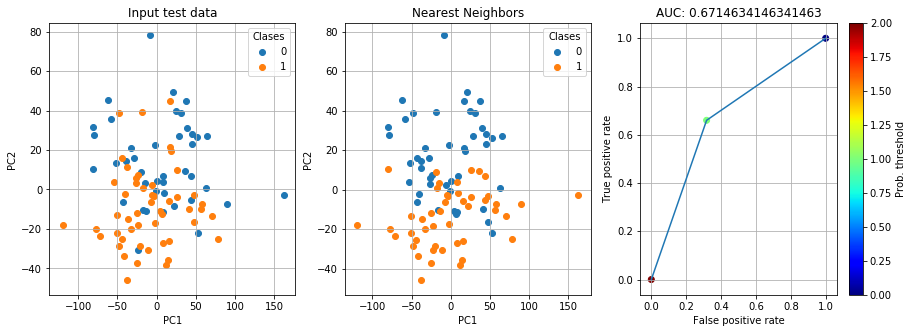

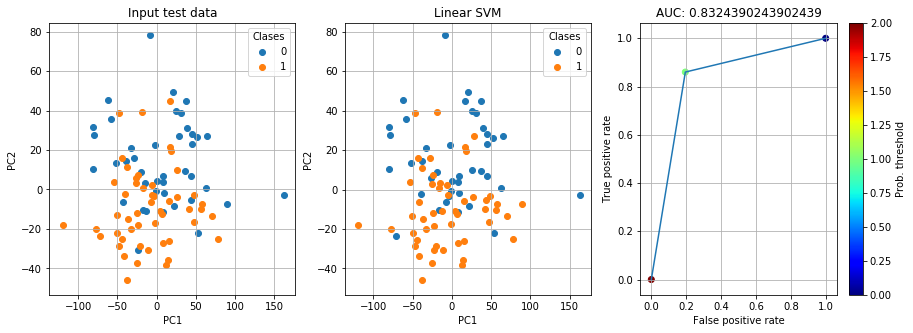

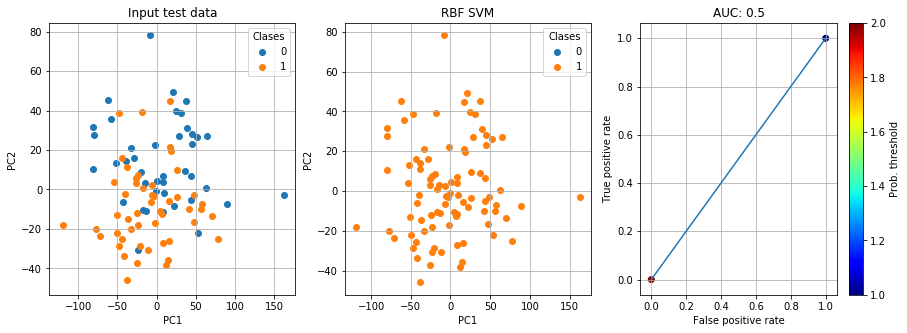

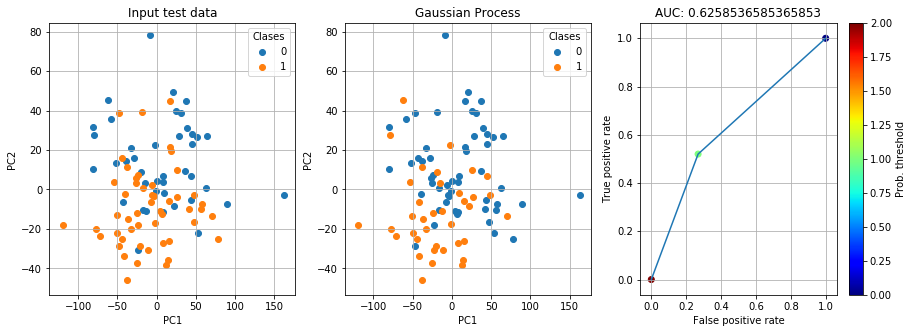

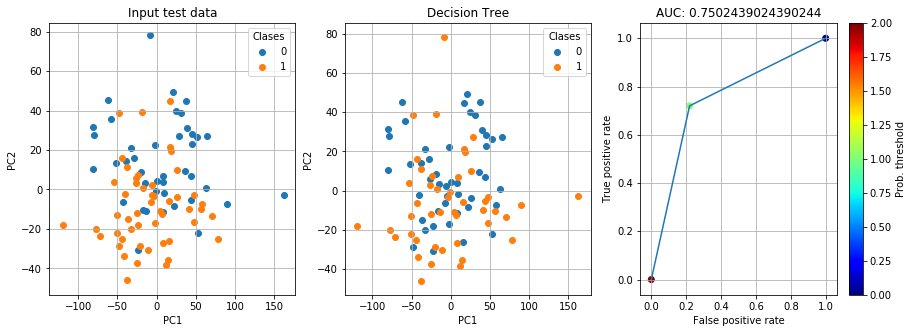

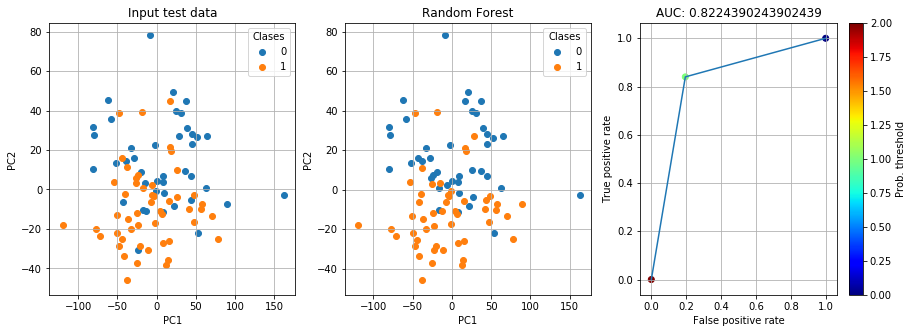

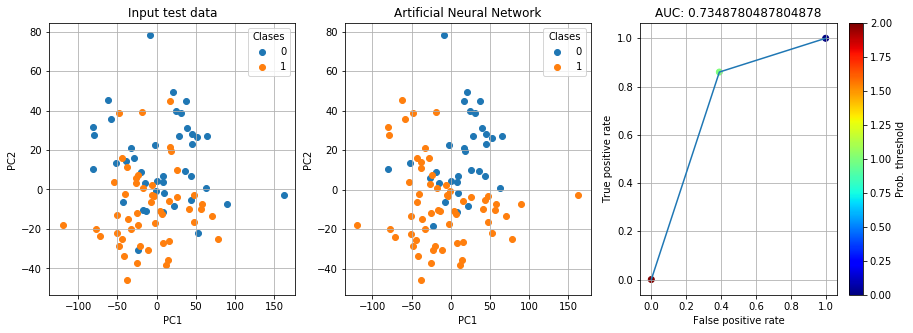

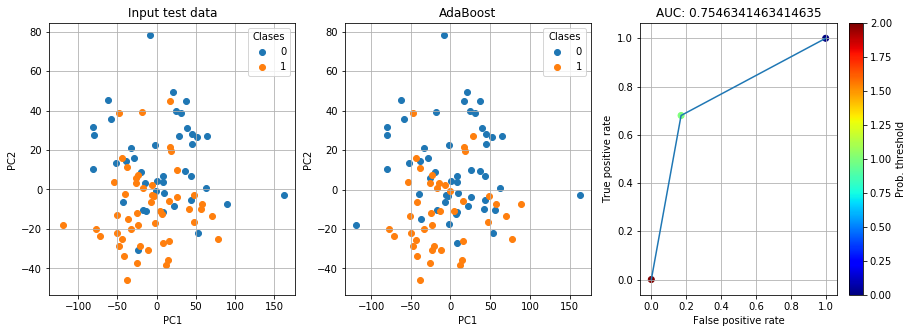

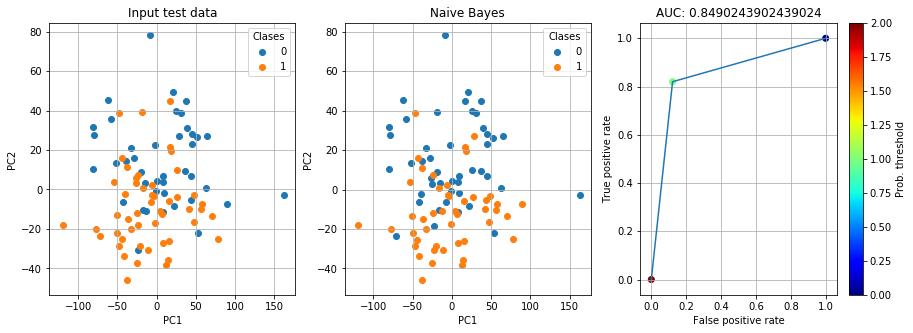

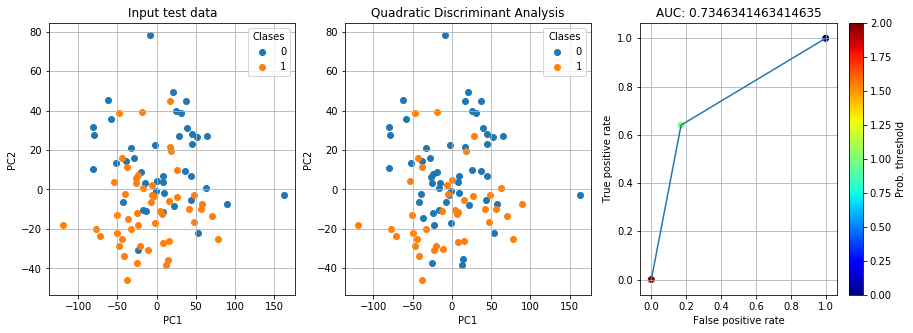

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from matplotlib import cm

def do_Classification(X_train, X_test, Y_train, Y_test, clf):
    clf.fit(X_train, Y_train.values.ravel())
    Y_predict = clf.predict(X_test).round()
    acc = accuracy_score(Y_test, Y_predict)
    f1 = f1_score(Y_test, Y_predict)
    roc_auc = roc_auc_score(Y_test, Y_predict)
    return (Y_predict, acc, f1, roc_auc)

def plot_ROC_curve(Y_test, Y_predict, ax):
    fpr, tpr, thresh = roc_curve(Y_test, Y_predict, pos_label=1)
    ax.set_title("AUC: {}".format(roc_auc_score(Y_test, Y_predict)))
    ax.plot(fpr, tpr)
    sc = ax.scatter(fpr, tpr, lw = 1, c = thresh, cmap = cm.jet)
    cb = plt.colorbar(sc)
    cb.set_label('Prob. threshold')
    ax.set_xlabel("False positive rate")
    ax.set_ylabel("True positive rate")
    ax.grid(True)
    return

def plot_Classification(X_train, X_test, Y_train, Y_test, clf, title):
    Y_predict, acc, f1, roc_auc = do_Classification(X_train, X_test, Y_train, Y_test, clf)
    table_predict = pd.DataFrame(X_test.values, columns = X_test.columns)
    table_predict['clftarget'] = Y_predict
    table_test = pd.merge(X_test, Y_test, left_index=True, right_index=True)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    plot_PCA_Classification(table_test, 'target', 'Input test data', ax1)
    plot_PCA_Classification(table_predict, 'clftarget', title, ax2)
    plot_ROC_curve(Y_test, Y_predict, ax3)
    return

classifiers = {
    'Nearest Neighbors': KNeighborsClassifier(n_neighbors = 3),
    'Linear SVM': SVC(kernel = "linear", C = 0.03, probability = True),
    'RBF SVM': SVC(kernel = "rbf", C = 1, gamma = 1.5, probability = True),
    'Gaussian Process': GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    'Decision Tree': DecisionTreeClassifier(max_depth=6),
    'Random Forest': RandomForestClassifier(max_depth=6, n_estimators=10, max_features=1),
    'Artificial Neural Network': MLPClassifier(solver="sgd", alpha=1),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Naive Bayes': GaussianNB(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis() 
}

for name, clf in classifiers.items():
    plot_Classification(X_train, X_test, Y_train, Y_test, clf, name)

**PREGUNTA**: ¿Qué comportamiento observa en las métricas para distintos muestreos del conjunto testing? ¿Por qué este análysis sería considerado "trampa" en un caso real?

### 2.1 - Selección de Modelo
Seleccione ahora un conjunto de testing del 30% de los datos, usando una semilla aleatoria fija (por ejemplo 42).
Realice una validación cruzada con un K-Fold de 20 y reporte los promedios de accuracy, F1-score y AUC utilizando sólo los conjuntos de validación (no testing!).

In [4]:
from sklearn.model_selection import KFold

X_train, X_test, Y_train, Y_test = split_data_set(
    table.dropna(),
    STDfeatures + ['PC1', 'PC2'],
    ['target'],
    0.3,
    42)

def do_KFold(X, Y, clf, kf):
    acc_values = []
    f1_values = []
    roc_auc_values = []
    for trainKF_index, testKF_index in kf.split(X):
        Y_predict, acc, f1, roc_auc = do_Classification(X.iloc[trainKF_index],
                                                        X.iloc[testKF_index], 
                                                        Y.iloc[trainKF_index], 
                                                        Y.iloc[testKF_index], 
                                                        clf)
        acc_values.append(acc)
        f1_values.append(f1)
        roc_auc_values.append(roc_auc)
    return (sum(acc_values)/len(acc_values), 
            sum(f1_values)/len(f1_values),
            sum(roc_auc_values)/len(roc_auc_values)) 

kf = KFold(n_splits=20, shuffle=True)
names = []
acc_mean_values = []
f1_mean_values = []
roc_auc_mean_values = []
for name, clf in classifiers.items():
    while True:     
        try:
            acc_mean, f1_mean, roc_auc_mean = do_KFold(X_train, Y_train, clf, kf)
        except Exception as e:
            print (e.message, e.args)
            continue
        break
    names.append(name)
    acc_mean_values.append(acc_mean)
    f1_mean_values.append(f1_mean)
    roc_auc_mean_values.append(roc_auc_mean)

clf_scores = {}
clf_scores['Names'] = names
clf_scores['ACC Mean'] = acc_mean_values
clf_scores['F1 Mean'] = f1_mean_values
clf_scores['ROC AUC Mean'] = roc_auc_mean_values

    
print(pd.DataFrame(clf_scores))

                             Names  ACC Mean   F1 Mean  ROC AUC Mean
0                Nearest Neighbors  0.570909  0.612168      0.557044
1                       Linear SVM  0.810000  0.820385      0.803264
2                          RBF SVM  0.542727  0.692649      0.500000
3                 Gaussian Process  0.539545  0.568888      0.546786
4                    Decision Tree  0.749545  0.759477      0.755149
5                    Random Forest  0.774545  0.792992      0.782272
6        Artificial Neural Network  0.561818  0.531135      0.597113
7                         AdaBoost  0.786818  0.777936      0.779613
8                      Naive Bayes  0.785000  0.783254      0.800099
9  Quadratic Discriminant Analysis  0.746818  0.762577      0.741369


C:\Users\og\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\og\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\og\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\og\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\og\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\og\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\og\anaconda3\lib\site-packages\sklearn\disc

**PREGUNTA**: Haga un ranking de los 3 mejores clasificadores para este problema (con una semilla fija la selección del conjunto de training). Justifique su elección utilizando las métricas computadas.

In [5]:
pd.DataFrame(clf_scores)

,Names,ACC Mean,F1 Mean,ROC AUC Mean
0,Nearest Neighbors,0.570909,0.612168,0.557044
1,Linear SVM,0.810000,0.820385,0.803264
2,RBF SVM,0.542727,0.692649,0.500000
3,Gaussian Process,0.539545,0.568888,0.546786
4,Decision Tree,0.749545,0.759477,0.755149
5,Random Forest,0.774545,0.792992,0.782272
6,Artificial Neural Network,0.561818,0.531135,0.597113
7,AdaBoost,0.786818,0.777936,0.779613
8,Naive Bayes,0.785000,0.783254,0.800099
9,Quadratic Discriminant Analysis,0.746818,0.762577,0.741369


In [6]:
pd.DataFrame(clf_scores)

,Names,ACC Mean,F1 Mean,ROC AUC Mean
0,Nearest Neighbors,0.570909,0.612168,0.557044
1,Linear SVM,0.810000,0.820385,0.803264
2,RBF SVM,0.542727,0.692649,0.500000
3,Gaussian Process,0.539545,0.568888,0.546786
4,Decision Tree,0.749545,0.759477,0.755149
5,Random Forest,0.774545,0.792992,0.782272
6,Artificial Neural Network,0.561818,0.531135,0.597113
7,AdaBoost,0.786818,0.777936,0.779613
8,Naive Bayes,0.785000,0.783254,0.800099
9,Quadratic Discriminant Analysis,0.746818,0.762577,0.741369


# RESULTADO
### 1°. LINEAR SVM
### 2°. NAIVE BAYES
### 3°. ADABOOST

### 2.2 - Selección de Parámetros
Seleccione uno de los 3 clasificadores de su ranking. Seleccione un parámetro del modelo y haga un [gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) (o puede hacerlo manualmente también) para elegir un parámetro adecuado para su clasificador. Muestre sus resultados utilizando un gráfico con el parámetro como la abcisa (eje x).

In [ ]:
%matplotlib inline

acc_values = []
f1_values = []
roc_auc_values = []
parameter_values = []

for i in range(1000):

    while True:
        try:
            clf = RandomForestClassifier(max_depth=6, n_estimators = i+1, max_features=1)
            acc, f1, roc_auc = do_KFold(X_train, Y_train, clf, kf)
            acc_values.append(acc)
            f1_values.append(f1)
            roc_auc_values.append(roc_auc)
            parameter_values.append(i)
            print(i)
        except:
            print("ERROR, RETRY")
            continue
        break
    
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.plot(parameter_values, acc_values)
ax2.plot(parameter_values, f1_values)
ax3.plot(parameter_values, roc_auc_values)

0
1
2
3
4
5
6
7
ERROR, RETRY
8
9
10
ERROR, RETRY
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
ERROR, RETRY
27
28
29
30
31
32
33
34
35
36
37
38
ERROR, RETRY
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
ERROR, RETRY
79
80
81
82
83
84
85
86
ERROR, RETRY
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
ERROR, RETRY
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
ERROR, RETRY
130
131
ERROR, RETRY
132
133
134
135
136
137
138
139
ERROR, RETRY
140
ERROR, RETRY
ERROR, RETRY
ERROR, RETRY
141


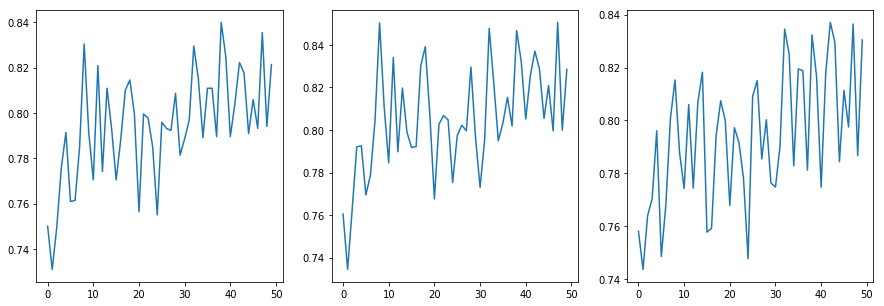

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.plot(parameter_values, acc_values)
ax2.plot(parameter_values, f1_values)
ax3.plot(parameter_values, roc_auc_values)

**PREGUNTA**: ¿Tiene sentido el resultado considerando el sigificado del parámetro dentro del contexto de su clasificador? Justifique.

### 3 - Reporte de Resultados
Entrene ahora su clasificador con el 70% de los datos (training) utilizando el **mejor** parámetro encontrado mediante cross-validation, y otra instancia con el parámetro original entregado (o el que venía por defecto). Evalúe en el restante 30% (testing) usando los 3 criterios (i.e., accuracy, F1-score y AUC) para ambos casos. 

In [5]:
#Here your code

**PREGUNTA FINAL**: ¿Le fue útil realizar el ejercicio de cross-validation para obtener mejores resultados?. Comente brevemente porqué hacer cross-validation "no es trampa", haciendo referencia a lo comentado en la sección 2.